In [2]:
include("cutoff.jl")
include("ehrenfest.jl")

expected_hitting_times_from_0 (generic function with 1 method)

In [8]:
# parameters
num_balls = 32
lazy = true

true

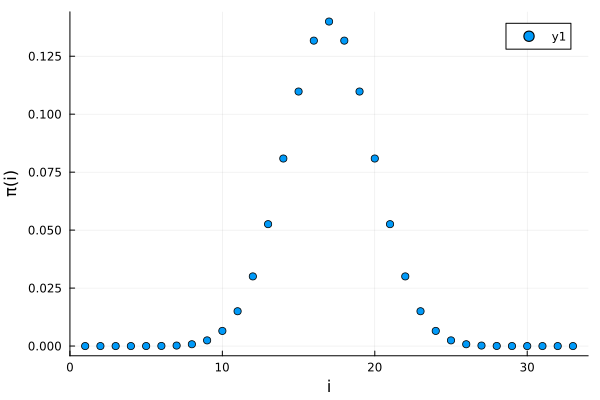

In [9]:
P = transition_matrix_lazy_ehrenfest(num_balls)
μ = stationary_distribution(P)
plot(μ, xlims=(0, num_balls+2) ,seriestype=:scatter, ylabel="π(i)", xlabel="i")

Cutoff: 27


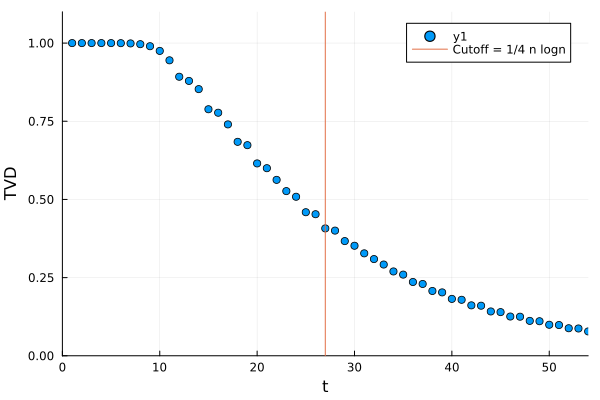

In [10]:
# this is the cutoff point given by Aldous
cutoff = Int(floor(1/4 * num_balls * log(num_balls)))
println("Cutoff: ", cutoff)

num_steps = cutoff * 2
num_chains = 100000
initial_dist = Vector{Int}([0, num_balls])
# initial_dist = Vector{Int}([num_balls/2, num_balls/2])
all_counts = run_chains(initial_dist, num_steps, num_chains, lazy=lazy)
tvds = get_tvds(all_counts, μ)
p = plot(tvds, 
    xlims=(0, length(tvds)), ylims=(0, 1.1), seriestype=:scatter, 
    ylabel="TVD", xlabel="t"
)
vline!([cutoff], label="Cutoff = 1/4 n logn")
display(p)

In [7]:
hs = expected_hitting_times_from_0(num_balls)
println(hs)

[1.03125, 2.095766129032258, 3.195766129032258, 4.3336971635150165, 5.512268592086445, 6.734490814308668, 8.003721583539438, 9.323721583539438, 10.698721583539438, 12.13350419223509, 13.63350419223509, 15.204932763663662, 16.854932763663662, 18.59177486892682, 20.42510820226015, 22.366284672848387, 24.428784672848387, 26.628784672848386, 28.985927529991244, 31.524389068452784, 34.274389068452784, 37.274389068452784, 40.57438906845278, 44.241055735119446, 48.366055735119446, 53.08034144940516, 58.58034144940516, 65.18034144940516, 73.43034144940516, 84.43034144940516, 100.93034144940516, 133.93034144940515]


In [11]:
w = 7
sum(μ[Int(num_balls/2) - w:Int(num_balls/2) + w])

0.9889180478527321

In [13]:
tₘᵢₓ(tvds, 0.39)

29